In [6]:
import numpy as np
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=20, # 20個生成
                           n_features=2, # 2次元
                           n_classes=3, # 3クラス
                           n_clusters_per_class=1,
                           n_informative=2,
                           n_redundant=0,
                           n_repeated=0,
                           random_state=8   # 乱数種（再現用）
                           )

In [7]:
X, y

(array([[ 0.96625625, -1.16083   ],
        [-0.8956197 , -1.1904577 ],
        [-1.12244282, -1.49551075],
        [ 0.19381815,  0.71599453],
        [-0.81613811,  2.50559359],
        [-2.15730517, -0.38081097],
        [ 1.06520392, -1.06613765],
        [ 1.19850953, -1.19674272],
        [-1.28835506, -0.03837451],
        [-0.64803468,  2.03441301],
        [ 0.87697793, -0.61834883],
        [ 0.88418282, -0.59566976],
        [-2.08388511,  0.74825788],
        [ 0.9769429 , -1.30079452],
        [-1.71615661, -1.75243316],
        [-1.3018617 , -0.99043422],
        [-2.03271691,  0.38570548],
        [ 1.05087256, -1.47846795],
        [-0.43685499,  0.32573499],
        [-1.51666496, -1.16409828]]),
 array([1, 2, 2, 0, 0, 0, 1, 1, 2, 0, 1, 1, 0, 1, 2, 2, 0, 1, 0, 2]))

In [8]:
import matplotlib.pyplot as plt 
%matplotlib inline 
plt.set_cmap(plt.cm.brg)

<Figure size 432x288 with 0 Axes>

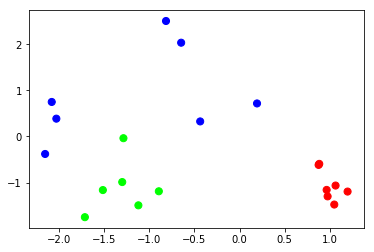

In [9]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50)

In [10]:
# 境界線を引く関数の定義

def plotBoundary(X, clf, mesh=True, cmap=plt.get_cmap()):

    # plot range
    x_min = min(X[:,0])
    x_max = max(X[:,0])
    y_min = min(X[:,1])
    y_max = max(X[:,1])

    # visualizing decision function
    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j] # make a grid
    
    Z = clf.predict(np.c_[XX.ravel(), YY.ravel()]) # evaluate the value 
    
    Z = Z.reshape(XX.shape) # just reshape

    if mesh:
        plt.pcolormesh(XX, YY, Z, zorder=-10, cmap=cmap)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

In [12]:
from sklearn import neighbors

clf = neighbors.KNeighborsClassifier(n_neighbors=1)

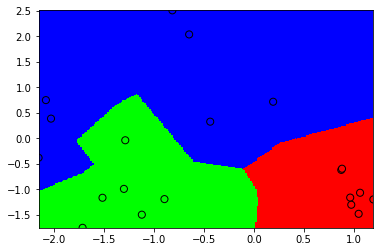

In [14]:
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y, edgecolor='k')

plotBoundary(X, clf)

In [15]:
from sklearn import linear_model
clf = linear_model.LogisticRegression()

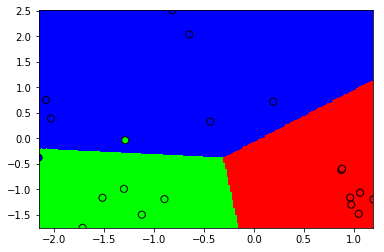

In [17]:
clf.fit(X, y)
plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y, edgecolor="k")
plotBoundary(X, clf)

In [18]:
from sklearn import svm 
clf = svm.SVC(kernel='linear', C=10)

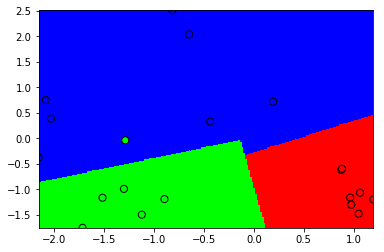

In [19]:
clf.fit(X, y)
plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y, edgecolor="k")
plotBoundary(X, clf)

In [22]:
# 非線形なSVM
from sklearn import svm
clf = svm.SVC(kernel='rbf', C=10)

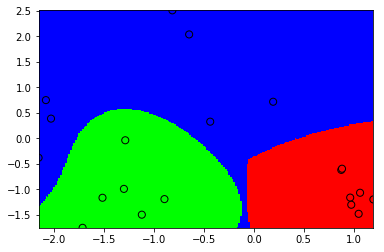

In [23]:
clf.fit(X, y)
plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y, edgecolor="k")
plotBoundary(X, clf)

# 多クラス識別 : One-vs-Rest(ロジスティック回帰)

In [24]:
# 境界線を引く関数の定義

def plotBoundary2(X, clf, boundary=True):
    colors = ['k'];
    linestyles = ['-'];
    levels = [0];

    # plot range
    x_min = min(X[:,0])
    x_max = max(X[:,0])
    y_min = min(X[:,1])
    y_max = max(X[:,1])

    # visualizing decision function
    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j] # make a grid
    
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()]) # evaluate the value 
    
    n_classes = Z.shape[1]
    
    for c in range(n_classes):
        Zc = Z[:,c].reshape(XX.shape) # just reshape

        if boundary:
            plt.contour(XX, YY, Zc, 
                        colors=colors,
                        linestyles=linestyles,
                        levels=levels) # draw lines (level=0:boundary)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

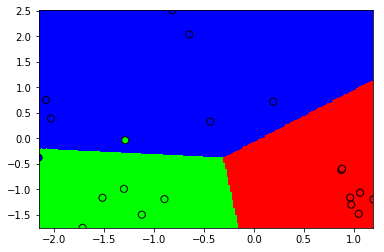

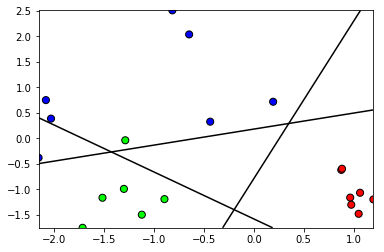

In [25]:
clf = linear_model.LogisticRegression()

clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y, edgecolor="k")
plotBoundary(X, clf)
plt.show()

plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y, edgecolor="k")
plotBoundary2(X, clf)

In [26]:
# 境界線を引く関数の定義

def plotBoundary3(X, clf, mesh=True, boundary=True):
    colors = ['k'];
    linestyles = ['-.', '-', '--'];
    levels = [-1,0,1];
    cmaps = [plt.cm.Blues, plt.cm.Reds, plt.cm.Greens, plt.cm.Purples]
    
    # plot range
    x_min = min(X[:,0])
    x_max = max(X[:,0])
    y_min = min(X[:,1])
    y_max = max(X[:,1])

    # visualizing decision function
    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j] # make a grid
    
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()]) # evaluate the value 
    print(Z.shape)
    n_classes = Z.shape[1]
    
    for c in range(n_classes):
        Zc = Z[:,c].reshape(XX.shape) # just reshape
        plt.show()
        if mesh:
            plt.pcolormesh(XX, YY, Zc, zorder=-10, cmap=cmaps[c])
            plt.colorbar()
            
        if boundary:
            plt.contour(XX, YY, Zc, 
                        colors=colors,
                        linestyles=linestyles,
                        levels=levels)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

(40000, 3)


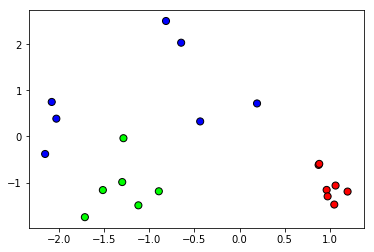

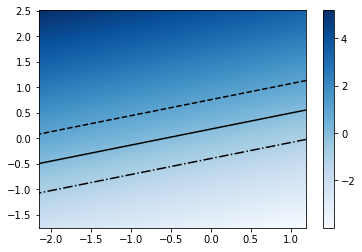

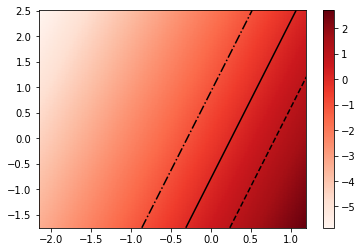

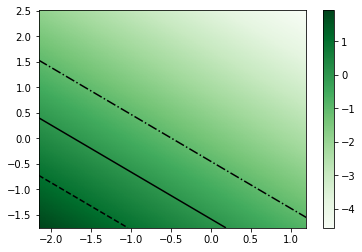

In [27]:
plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y, edgecolor="k")
plotBoundary3(X, clf)

In [28]:
# 境界線を引く関数の定義

import numpy.ma as ma # MaskedArray

def plotBoundary4(X, clf, mesh=True, boundary=True):
    colors = ['k'];
    linestyles = ['-.', '-', '--'];
    levels = [-1,0,1];
    cmaps = [plt.cm.Blues, plt.cm.Reds, plt.cm.Greens, plt.cm.Purples]
    
    # plot range
    x_min = min(X[:,0])
    x_max = max(X[:,0])
    y_min = min(X[:,1])
    y_max = max(X[:,1])

    # visualizing decision function
    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j] # make a grid
    
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()]) # evaluate the value 
    
    n_classes = Z.shape[1]
    
    Zmax = Z.argmax(axis=1).reshape(XX.shape)
    
    for c in range(n_classes):
        Zc = ma.array(Z[:,c].reshape(XX.shape), mask=(Zmax != c))
        
        if mesh:
            plt.pcolormesh(XX, YY, Zc, zorder=-10, cmap=cmaps[c])
            
        if boundary:
            plt.contour(XX, YY, Zc, 
                        colors=colors,
                        linestyles=linestyles,
                        levels=levels)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

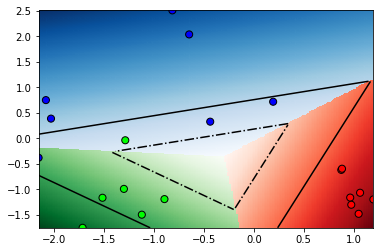

In [29]:
plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y, edgecolors='k')
plotBoundary4(X, clf)

# 多クラス識別 : One-vs-Rest(SVM)

In [30]:
clf = svm.SVC(kernel='linear', decision_function_shape='ovr', C=10)

In [31]:
clf.fit(X, y)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

(40000, 3)


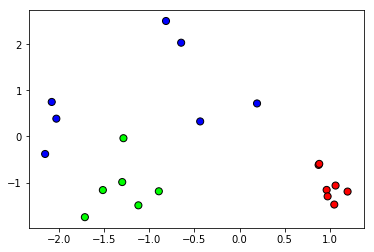

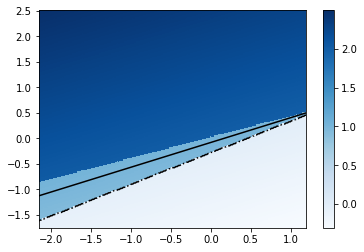

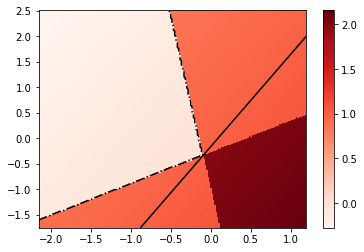

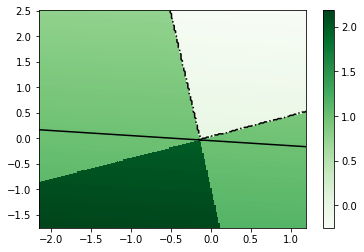

/opt/conda/lib/python3.6/site-packages/matplotlib/contour.py:1173: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


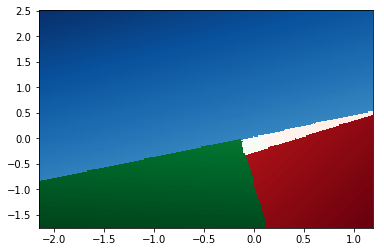

In [32]:
plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y, edgecolors='k')
plotBoundary3(X, clf)
plt.show()

plotBoundary4(X, clf) 

In [33]:
clf = svm.SVC(kernel='rbf', 
              decision_function_shape='ovr', C=10)
clf.fit(X, y)


SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

(40000, 3)


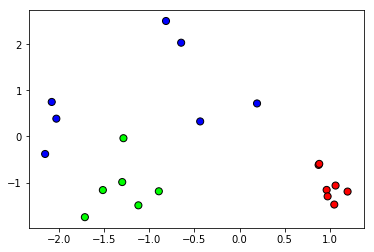

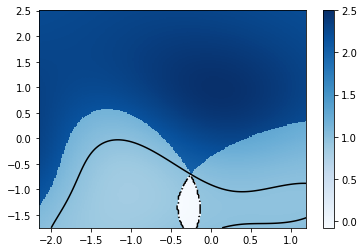

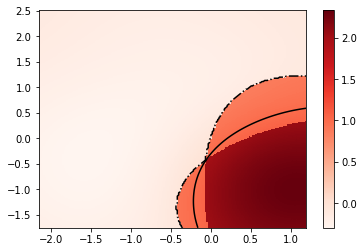

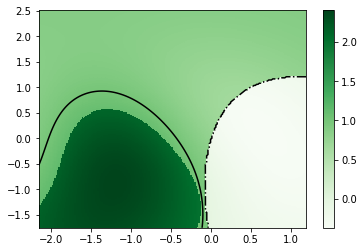

/opt/conda/lib/python3.6/site-packages/matplotlib/contour.py:1173: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


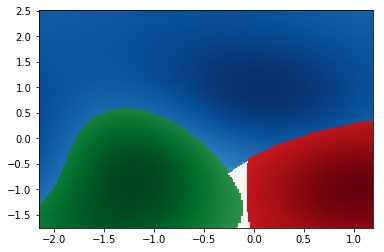

In [34]:
plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y, edgecolors='k')
plotBoundary3(X, clf)
plt.show()
plotBoundary4(X, clf)

# 多クラス識別 : One-vs-One(SVM)

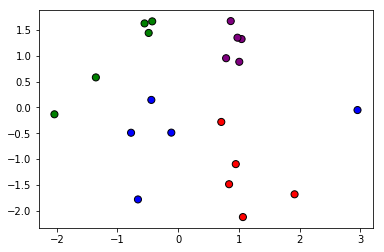

In [35]:
X, y = make_classification(n_samples=20, # 20個生成
                           n_features=2, # 2次元
                           n_classes=4, # 4クラス
                           n_clusters_per_class=1,
                           n_informative=2,
                           n_redundant=0,
                           n_repeated=0,
                           random_state=8   # 乱数種（再現用）
                           )

from matplotlib.colors import ListedColormap as lcmap
brgp = lcmap(['blue','red','green','purple'])

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=brgp, edgecolors='k');

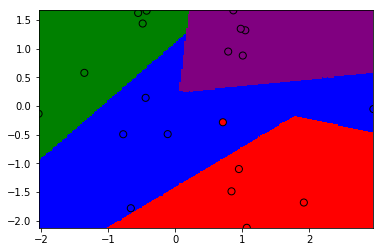

(40000, 4)


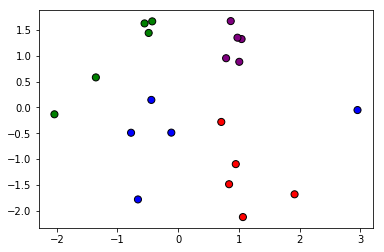

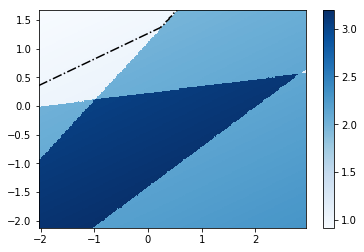

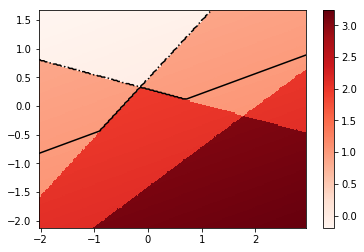

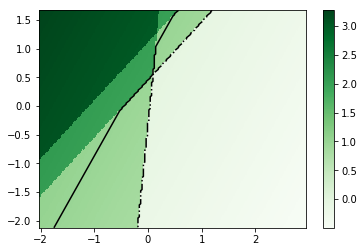

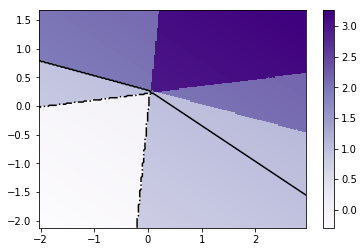

In [36]:
clf = svm.SVC(kernel='linear', 
              decision_function_shape='ovr') # one-vs-rest, one-vs-all
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y, cmap=brgp, edgecolors='k')
plotBoundary(X, clf, cmap=brgp)
plt.show()

plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y, cmap=brgp, edgecolors='k')
plotBoundary3(X, clf)

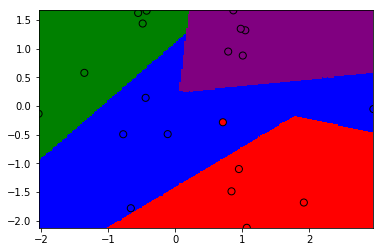

(40000, 6)


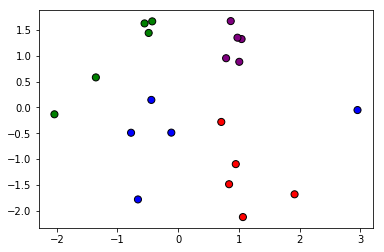

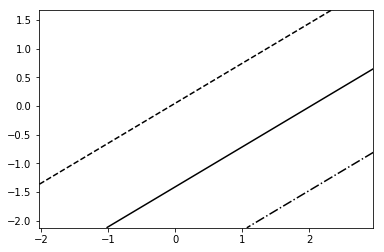

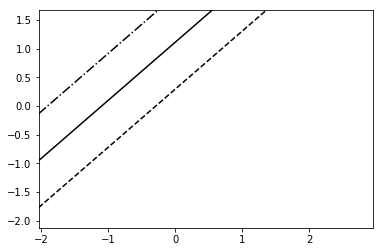

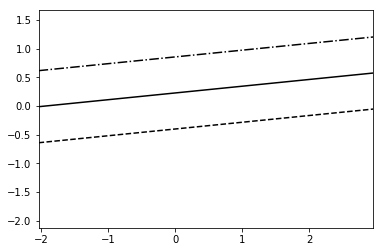

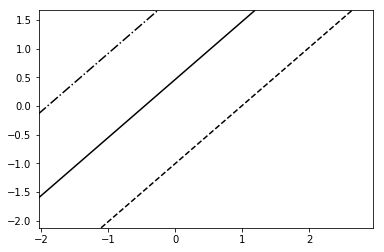

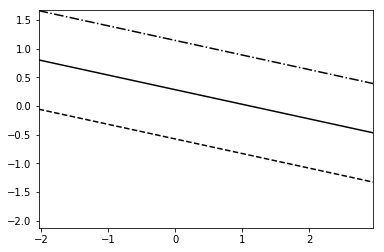

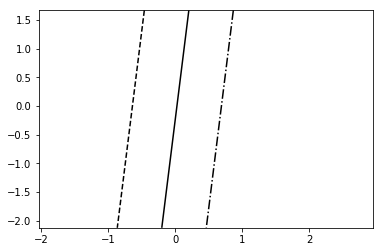

In [38]:
clf = svm.SVC(kernel='linear', 
              decision_function_shape='ovo') # one-vs-one
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y, cmap=brgp, edgecolors='k')
plotBoundary(X, clf, cmap=brgp)
plt.show()

plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y, cmap=brgp, edgecolors='k')
plotBoundary3(X, clf, mesh=False)

In [39]:
from itertools import combinations

In [40]:
list(combinations([0,1,2,3], 2))

[(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]

In [41]:
list(combinations("ABCD", 2))

[('A', 'B'), ('A', 'C'), ('A', 'D'), ('B', 'C'), ('B', 'D'), ('C', 'D')]

In [42]:
list(combinations("ABCDEFG", 2))
# クラス数が多い場合はOne - vs Oneはあまり使われない

[('A', 'B'),
 ('A', 'C'),
 ('A', 'D'),
 ('A', 'E'),
 ('A', 'F'),
 ('A', 'G'),
 ('B', 'C'),
 ('B', 'D'),
 ('B', 'E'),
 ('B', 'F'),
 ('B', 'G'),
 ('C', 'D'),
 ('C', 'E'),
 ('C', 'F'),
 ('C', 'G'),
 ('D', 'E'),
 ('D', 'F'),
 ('D', 'G'),
 ('E', 'F'),
 ('E', 'G'),
 ('F', 'G')]

# KNN　最近傍識別器(NN)、k近傍識別器(KNN)

In [43]:
import numpy as np
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=50, # 20個生成
                  n_features=2, # 2次元
                  centers=5,    # クラスタ中心2個
                  cluster_std = .8, # クラスタの大きさ（標準偏差）
                  random_state=3   # 乱数種（再現用）
                 )

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.set_cmap(plt.cm.gist_ncar)

<Figure size 432x288 with 0 Axes>

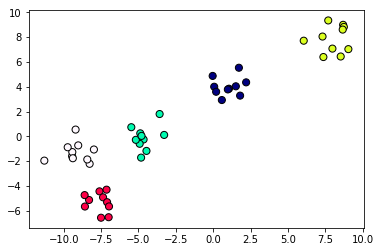

In [45]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='k');

In [46]:
# 境界線を引く関数の定義

def plotBoundary(X, clf, mesh=True, cmap=plt.get_cmap()):

    # plot range
    x_min = min(X[:,0])
    x_max = max(X[:,0])
    y_min = min(X[:,1])
    y_max = max(X[:,1])

    # visualizing decision function
    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j] # make a grid
    
    Z = clf.predict(np.c_[XX.ravel(), YY.ravel()]) # evaluate the value 
    
    Z = Z.reshape(XX.shape) # just reshape

    if mesh:
        plt.pcolormesh(XX, YY, Z, zorder=-10, cmap=cmap)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

In [47]:
from sklearn import neighbors

clf = neighbors.KNeighborsClassifier(n_neighbors=1)

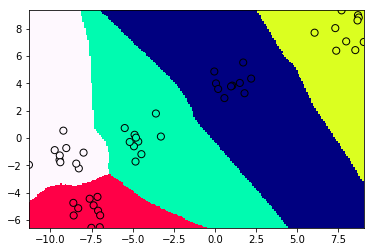

In [48]:
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y, edgecolors='k')

plotBoundary(X, clf) # 境界線の描画

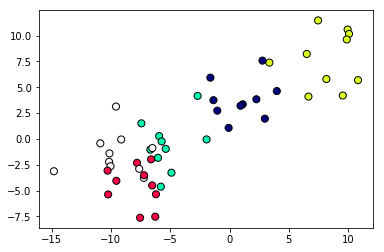

In [49]:
X, y = make_blobs(n_samples=50, # 20個生成
                  n_features=2, # 2次元
                  centers=5,    # クラスタ中心2個
                  cluster_std =2, # クラスタの大きさ（標準偏差）
                  random_state=3   # 乱数種（再現用）
                 )
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='k');

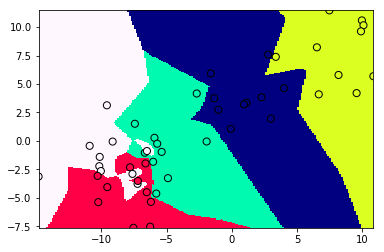

In [50]:
clf = neighbors.KNeighborsClassifier(n_neighbors=1)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y, edgecolors='k')

plotBoundary(X, clf) # 境界線の描画

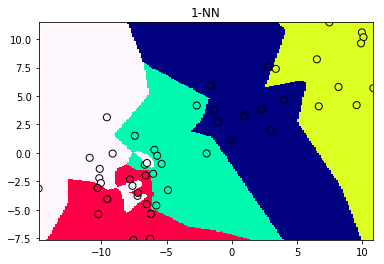

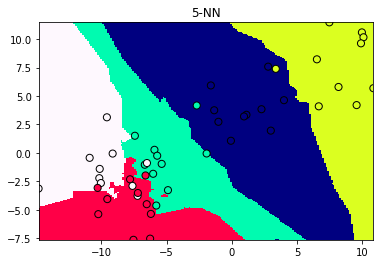

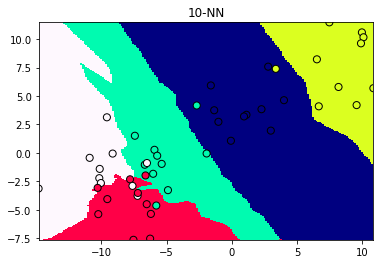

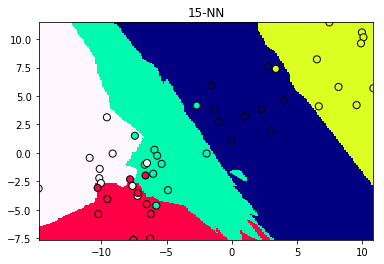

In [51]:
for n in [1, 5, 10, 15]:
    clf.n_neighbors = n
    plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y, edgecolors='k')
    plotBoundary(X, clf)
    plt.title("{0}-NN".format(n))
    plt.show()

In [52]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = data.data
y = data.target

In [53]:
from sklearn.model_selection import ShuffleSplit
ss = ShuffleSplit(n_splits=1, 
                  train_size=0.8, 
                  test_size=0.2, 
                  random_state=0)

train_index, test_index = next(ss.split(X, y))

X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]

In [54]:
from sklearn import neighbors

clf = neighbors.KNeighborsClassifier(n_neighbors=1)
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [55]:
clf.score(X_train, y_train)

1.0

In [56]:
clf.score(X_test, y_test)

0.9122807017543859

In [57]:
n_range = range(1,20)
scores = []
for n in n_range:
    clf.n_neighbors = n
    score = clf.score(X_test, y_test)
    print(n, score) 
    scores.append(score)
scores = np.array(scores)

1 0.9122807017543859
2 0.8947368421052632
3 0.9122807017543859
4 0.9210526315789473
5 0.9385964912280702
6 0.9385964912280702
7 0.9473684210526315
8 0.9473684210526315
9 0.9649122807017544
10 0.9473684210526315
11 0.9649122807017544
12 0.9649122807017544
13 0.9649122807017544
14 0.9649122807017544
15 0.9649122807017544
16 0.9649122807017544
17 0.9649122807017544
18 0.9649122807017544
19 0.9649122807017544


(0.8, 1)

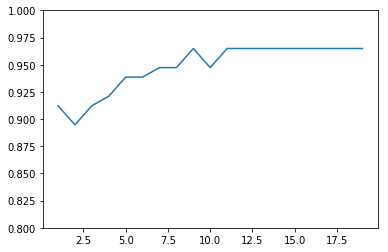

In [58]:
plt.plot(n_range, scores)
plt.ylim(0.8, 1)

# KNNの亜種

In [59]:
clf = neighbors.RadiusNeighborsClassifier()
clf.fit(X_train, y_train)

RadiusNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
             metric_params=None, outlier_label=None, p=2, radius=1.0,
             weights='uniform')

In [60]:
n_range = [2000, 4000, 8000]
for n in n_range:
    clf.radius = n
    score = clf.score(X_test, y_test)
    print(n, score) 

2000 0.6052631578947368
4000 0.5877192982456141
8000 0.5877192982456141


In [61]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scale = scaler.transform(X_train)
clf.fit(X_train_scale, y_train)

RadiusNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
             metric_params=None, outlier_label=None, p=2, radius=8000,
             weights='uniform')

In [62]:
X_test_scale = scaler.transform(X_test)

In [63]:
n_range = [3,4,5,6,7]
for n in n_range:
    clf.radius = n
    score = clf.score(X_test_scale, y_test)
    print(n, score) 


3 0.5877192982456141
4 0.5877192982456141
5 0.5877192982456141
6 0.5877192982456141
7 0.5877192982456141


# KNN : スケーリングしてKNN

In [64]:
clf = neighbors.KNeighborsClassifier(n_neighbors=1)
clf.fit(X_train_scale, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [65]:
n_range = range(1,20)
scores2 = []
for n in n_range:
    clf.n_neighbors = n
    score = clf.score(X_test_scale, y_test)
    print(n, score) 
    scores2.append(score)
scores2 = np.array(scores2)

1 0.9473684210526315
2 0.9385964912280702
3 0.9473684210526315
4 0.956140350877193
5 0.956140350877193
6 0.9824561403508771
7 0.9649122807017544
8 0.9736842105263158
9 0.9736842105263158
10 0.9824561403508771
11 0.9736842105263158
12 0.9736842105263158
13 0.9736842105263158
14 0.9736842105263158
15 0.9736842105263158
16 0.9736842105263158
17 0.9736842105263158
18 0.9736842105263158
19 0.9736842105263158


(0.8, 1)

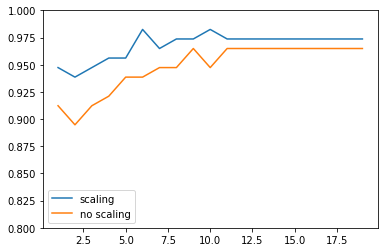

In [66]:
plt.plot(n_range, scores2, label="scaling")
plt.plot(n_range, scores, label="no scaling")
plt.legend(loc='best')
plt.ylim(0.8, 1)

# パーセプトロン

In [67]:
import numpy as np
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=20, # 20個生成
                  n_features=2, # 2次元
                  centers=2,    # クラスタ中心2個
                  cluster_std = 2, # クラスタの大きさ（標準偏差）
                  random_state=3   # 乱数種（再現用）
                 )

In [68]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.set_cmap(plt.cm.Paired);

<Figure size 432x288 with 0 Axes>

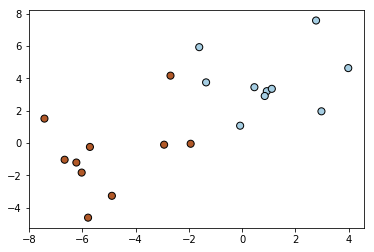

In [69]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='k');

In [70]:
# 境界線を引く関数の定義

def plotBoundary(X, clf, mesh=True, boundary=True, n_neighbors=1):

    # plot range
    x_min = min(X[:,0])
    x_max = max(X[:,0])
    y_min = min(X[:,1])
    y_max = max(X[:,1])

    # visualizing decision function
    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j] # make a grid
    
    Z = clf.predict(np.c_[XX.ravel(), YY.ravel()]) # evaluate the value 
    
    Z = Z.reshape(XX.shape) # just reshape

    if mesh:
        plt.pcolormesh(XX, YY, Z, zorder=-10) # paint in 2 colors, if Z > 0 or not

    if boundary:
        plt.contour(XX, YY, Z, 
                    colors='k', linestyles='-', levels=[0])

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

In [71]:
from sklearn.linear_model import Perceptron

clf = Perceptron()
clf

Perceptron(alpha=0.0001, class_weight=None, eta0=1.0, fit_intercept=True,
      max_iter=None, n_iter=None, n_jobs=1, penalty=None, random_state=0,
      shuffle=True, tol=None, verbose=0, warm_start=False)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/opt/conda/lib/python3.6/site-packages/matplotlib/contour.py:1173: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


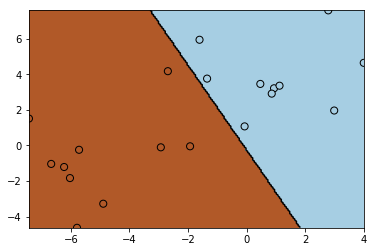

In [72]:
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y, edgecolors='k')

plotBoundary(X, clf) # 境界線の描画

In [73]:
from IPython.display import HTML
HTML('<iframe scrolling="no" src="https://www.geogebra.org/material/iframe/id/K8kugARA/width/939/height/469/border/888888/sri/true/sdz/true" width="939px" height="469px" style="border:0px;"> </iframe>')

In [74]:
from IPython.display import HTML
HTML('<iframe scrolling="no" src="https://www.geogebra.org/material/iframe/id/gMppVQV7/width/930/height/450/border/888888" width="930px" height="450px" style="border:0px;"> </iframe>')